## Name: David Geng

## Cars Data: Classification Analysis

Predicting price of Car's price Class


### Loading libraries


In [1]:
# importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from plotnine import *

# importing scipy
from scipy.stats import chi2_contingency

### Loading the Dataset


In [2]:
# # loading dataset
# from google.colab import files
# uploaded = files.upload()

In [3]:
# reading the dataset
df = pd.read_csv('cars.csv')

### Descriptive Analytics


In [4]:
# first few rows
df.head()

,price,age,km,fuel_type,hp,metallic_color,color,automatic,cc,doors,tax,weight
0,13500,23,46986,Diesel,90,1,Blue,0,2000,3,210,1165
1,13750,23,72937,Diesel,90,1,Silver,0,2000,3,210,1165
2,13950,24,41711,Diesel,90,1,Blue,0,2000,3,210,1165
3,14950,26,48000,Diesel,90,0,Black,0,2000,3,210,1165
4,13750,30,38500,Diesel,90,0,Black,0,2000,3,210,1170


In [5]:
# doors distribution
df.doors.value_counts()

5    674
3    622
4    138
2      2
Name: doors, dtype: int64

In [6]:
# removing 2 doors df
df = df.query('doors > 2')

In [7]:
# doors distribution
df.doors.value_counts()

5    674
3    622
4    138
Name: doors, dtype: int64

In [8]:
# last few rows
df.tail()

,price,age,km,fuel_type,hp,metallic_color,color,automatic,cc,doors,tax,weight
1431,7500,69,20544,Petrol,86,1,Blue,0,1300,3,69,1025
1432,10845,72,19000,Petrol,86,0,Grey,0,1300,3,69,1015
1433,8500,71,17016,Petrol,86,0,Blue,0,1300,3,69,1015
1434,7250,70,16916,Petrol,86,1,Grey,0,1300,3,69,1015
1435,6950,76,1,Petrol,110,0,Green,0,1600,5,19,1114


In [9]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   price           1434 non-null   int64 
 1   age             1434 non-null   int64 
 2   km              1434 non-null   int64 
 3   fuel_type       1434 non-null   object
 4   hp              1434 non-null   int64 
 5   metallic_color  1434 non-null   int64 
 6   color           1434 non-null   object
 7   automatic       1434 non-null   int64 
 8   cc              1434 non-null   int64 
 9   doors           1434 non-null   int64 
 10  tax             1434 non-null   int64 
 11  weight          1434 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 145.6+ KB


In [10]:
# unique values
df.nunique()

price              236
age                 77
km                1262
fuel_type            3
hp                  11
metallic_color       2
color               10
automatic            2
cc                  13
doors                3
tax                 13
weight              59
dtype: int64

In [11]:
# describe for summary stats
df.describe()

,price,age,km,hp,metallic_color,automatic,cc,doors,tax,weight
count,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000
mean,10734.493724,55.930265,68476.022315,101.532775,0.675035,0.055788,1576.753835,4.036262,87.101813,1072.470014
std,3628.157569,18.607171,37484.964817,14.966978,0.468525,0.229592,424.472672,0.950305,41.036562,52.643975
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63297.000000,110.000000,1.000000,0.000000,1600.000000,4.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87000.000000,110.000000,1.000000,0.000000,1600.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,16000.000000,5.000000,283.000000,1615.000000


In [12]:
# changing to categorical
df.metallic_color = df.metallic_color.astype('category')

In [13]:
# changing to categorical
df.automatic = df.automatic.astype('category')

In [14]:
# changing to categorical
df.doors = df.doors.astype('category')

In [15]:
# change price to categorical
df.price = np.where(df.price > 9900, 'high', 'low')

In [16]:
# frequency
df.price.value_counts()

low     727
high    707
Name: price, dtype: int64

In [17]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   price           1434 non-null   object  
 1   age             1434 non-null   int64   
 2   km              1434 non-null   int64   
 3   fuel_type       1434 non-null   object  
 4   hp              1434 non-null   int64   
 5   metallic_color  1434 non-null   category
 6   color           1434 non-null   object  
 7   automatic       1434 non-null   category
 8   cc              1434 non-null   int64   
 9   doors           1434 non-null   category
 10  tax             1434 non-null   int64   
 11  weight          1434 non-null   int64   
dtypes: category(3), int64(6), object(3)
memory usage: 116.6+ KB


### Graphical Summary


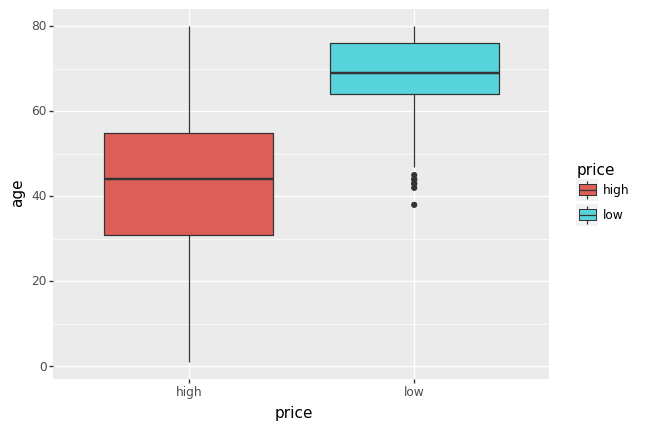

<ggplot: (8759632449290)>

In [18]:
# boxplot age vs price
ggplot(df, aes(x='price', y='age', fill='price')) + geom_boxplot()

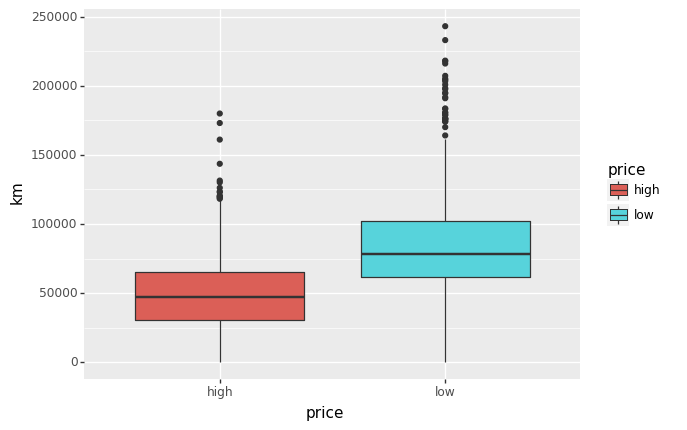

<ggplot: (8759632734010)>

In [19]:
# boxplot km vs price
ggplot(df, aes(x='price', y='km', fill='price')) + geom_boxplot()

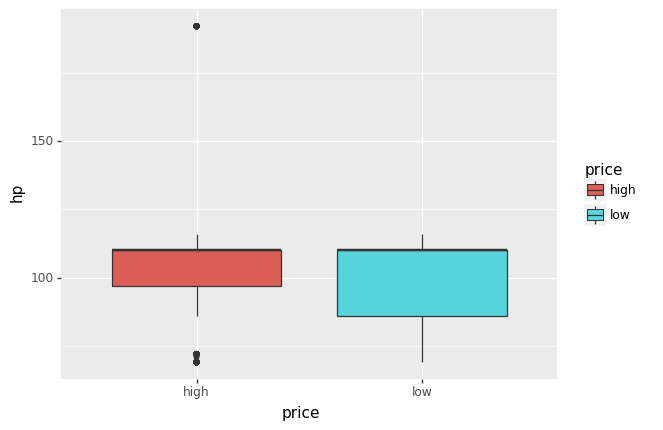

<ggplot: (8759632795712)>

In [20]:
# boxplot hp vs price
ggplot(df, aes(x='price', y='hp', fill='price')) + geom_boxplot()

/Users/weigeng/opt/anaconda3/lib/python3.9/site-packages/plotnine/layer.py:334: PlotnineWarning: stat_boxplot : Removed 1 rows containing non-finite values.


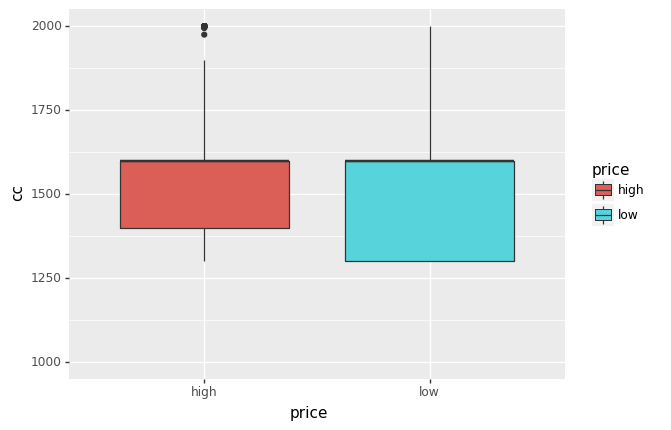

<ggplot: (8759632988862)>

In [21]:
# boxplot cc vs price
ggplot(df, aes(x='price', y='cc', fill='price')) + geom_boxplot() + ylim(1000, 2000)

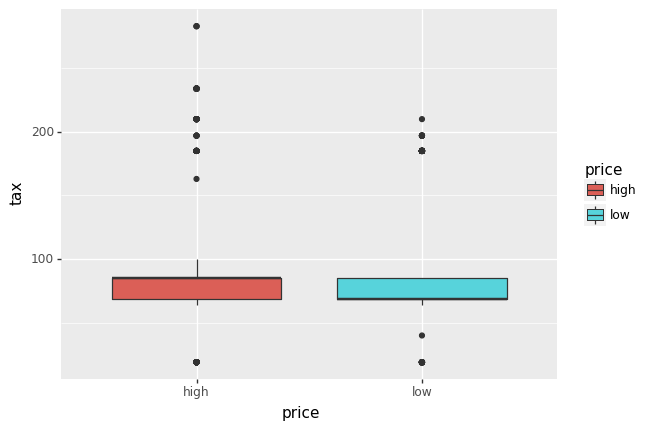

<ggplot: (8759633128659)>

In [22]:
# boxplot tax vs price
ggplot(df, aes(x='price', y='tax', fill='price')) + geom_boxplot()

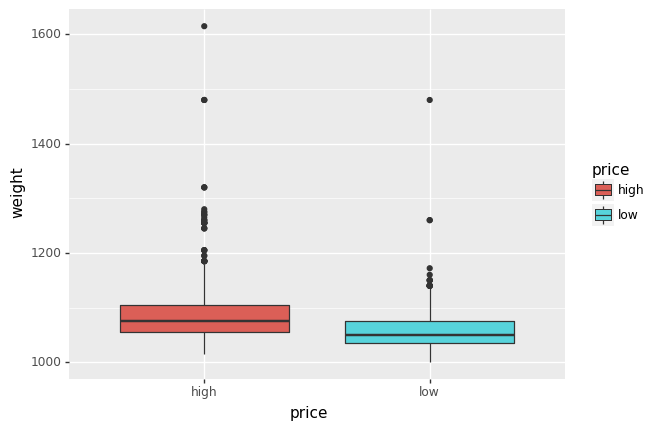

<ggplot: (8759633133231)>

In [23]:
# boxplot weight price
ggplot(df, aes(x='price', y='weight', fill='price')) + geom_boxplot()

In [24]:
# correlation matrix
df.corr()

,age,km,hp,cc,tax,weight
age,1.000000,0.505304,-0.155499,-0.098504,-0.199860,-0.470788
km,0.505304,1.000000,-0.331782,0.101693,0.276556,-0.029482
hp,-0.155499,-0.331782,1.000000,0.036786,-0.297830,0.090103
cc,-0.098504,0.101693,0.036786,1.000000,0.305637,0.334961
tax,-0.199860,0.276556,-0.297830,0.305637,1.000000,0.625771
weight,-0.470788,-0.029482,0.090103,0.334961,0.625771,1.000000


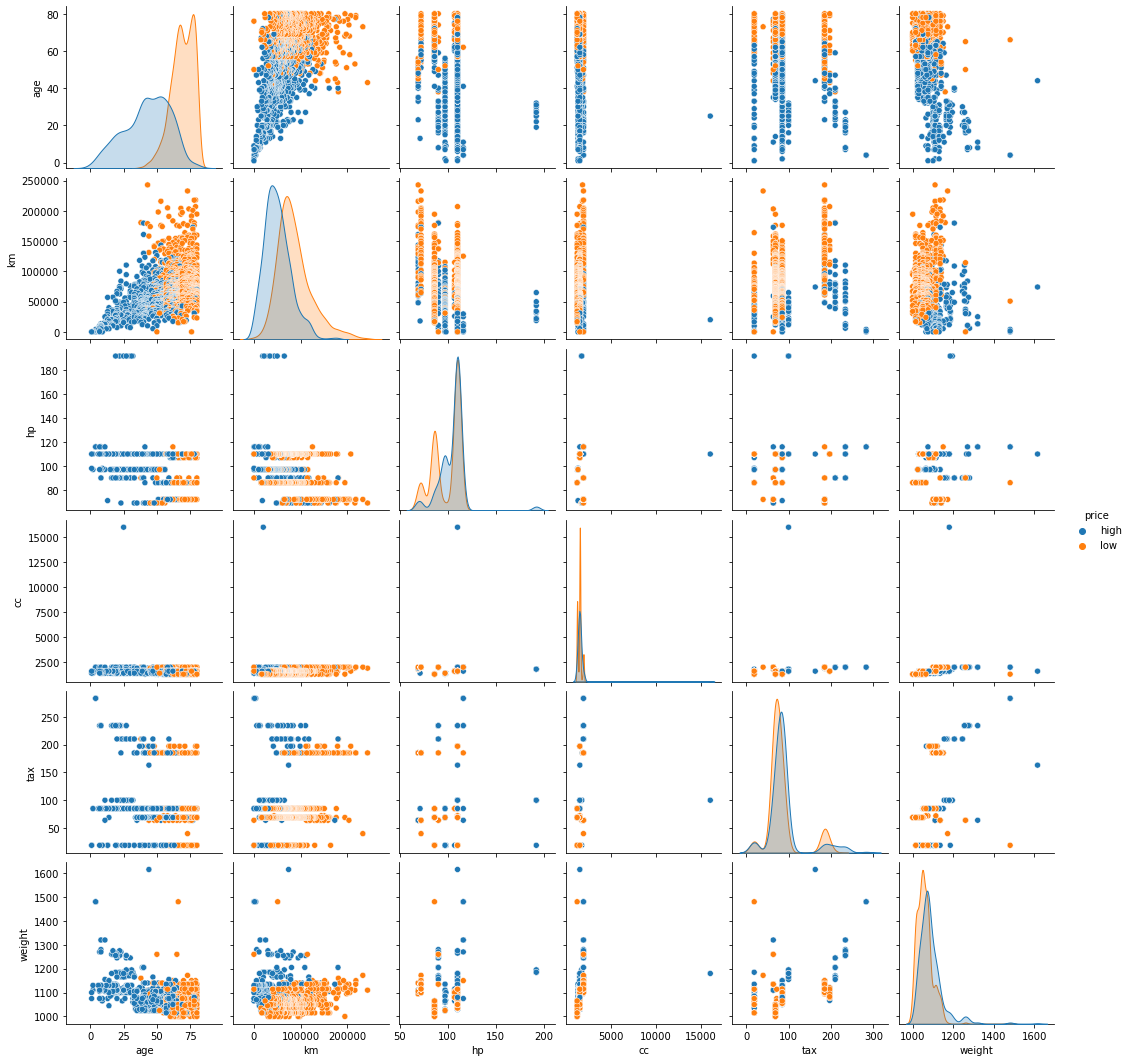

In [25]:
# scatterplot matrix
sns.pairplot(df, diag_kind='kde', hue='price')

In [26]:
# chi square test
for col in ['fuel_type', 'metallic_color', 'automatic', 'doors']:
    crosstab = pd.crosstab(df[col], df['price'], margins=True)
    stat, p_value, dof, expected = chi2_contingency(crosstab)
    print('P_value of Chi_Square Test between Price and ', col, p_value)

P_value of Chi_Square Test between Price and  fuel_type 0.5791389416085975
P_value of Chi_Square Test between Price and  metallic_color 0.12696490229939852
P_value of Chi_Square Test between Price and  automatic 0.9549221946445847
P_value of Chi_Square Test between Price and  doors 3.4439172193842412e-09


### Predictive Analytics: Choosing Predictors


In [27]:
# recoding price
df.price = np.where(df.price == 'high', 1, 0)

In [28]:
# choose predictors
predictors = ['age', 'km', 'weight', 'fuel_type', 'metallic_color', 'doors']

In [29]:
# target variable
target = 'price'

In [30]:
# creating dummy variables
X = pd.get_dummies(df[predictors], drop_first=True)
X.head()

,age,km,weight,fuel_type_Diesel,fuel_type_Petrol,metallic_color_1,doors_4,doors_5
0,23,46986,1165,1,0,1,0,0
1,23,72937,1165,1,0,1,0,0
2,24,41711,1165,1,0,1,0,0
3,26,48000,1165,1,0,0,0,0
4,30,38500,1170,1,0,0,0,0


In [31]:
# target variable
y = df[target]
y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: price, dtype: int64

### Predictive Analytics: Creating Training and Test Datasets


In [32]:
# creating train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=123, stratify=y)

In [33]:
X_train.head()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1147 entries, 1120 to 682
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               1147 non-null   int64
 1   km                1147 non-null   int64
 2   weight            1147 non-null   int64
 3   fuel_type_Diesel  1147 non-null   uint8
 4   fuel_type_Petrol  1147 non-null   uint8
 5   metallic_color_1  1147 non-null   uint8
 6   doors_4           1147 non-null   uint8
 7   doors_5           1147 non-null   uint8
dtypes: int64(3), uint8(5)
memory usage: 41.4 KB


In [34]:
y_train.head()

1120    0
1411    0
776     0
159     1
451     1
Name: price, dtype: int64

In [35]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 1275 to 127
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               287 non-null    int64
 1   km                287 non-null    int64
 2   weight            287 non-null    int64
 3   fuel_type_Diesel  287 non-null    uint8
 4   fuel_type_Petrol  287 non-null    uint8
 5   metallic_color_1  287 non-null    uint8
 6   doors_4           287 non-null    uint8
 7   doors_5           287 non-null    uint8
dtypes: int64(3), uint8(5)
memory usage: 10.4 KB


In [36]:
y_val.head()

1275    0
1377    0
1258    0
975     0
514     1
Name: price, dtype: int64

In [37]:
# standardizing the predictors
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_val_std = sc.transform(X_val)

### Logistic Regression Model


In [38]:
# import the libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [39]:
# linear model
model = LogisticRegression()

In [40]:
# train the model
model.fit(X_train, y_train)

LogisticRegression()

In [41]:
# prediction
y_pred = model.predict(X_val)

In [42]:
# confusion matrix
from sklearn.metrics import confusion_matrix
labels = np.unique(y_val)
cm = confusion_matrix(y_val, y_pred, labels=labels)
pd.DataFrame(cm, index=labels, columns=labels)

,0,1
0,137,9
1,21,120


In [43]:
# Evaluation scores
print('Accuracy', accuracy_score(y_val, y_pred))
print('Recall', recall_score(y_val, y_pred))
print('Precision', precision_score(y_val, y_pred))
print('F1 Score', f1_score(y_val, y_pred))

Accuracy 0.8954703832752613
Recall 0.851063829787234
Precision 0.9302325581395349
F1 Score 0.888888888888889


##### ROC Curve

In [44]:
# Extracting probabilities
probs = pd.Series(model.predict_proba(X_val)[:, 1])

In [45]:
# import roc metrics
from sklearn.metrics import roc_curve, roc_auc_score

Text(0, 0.5, 'TPR or Sensitivity')

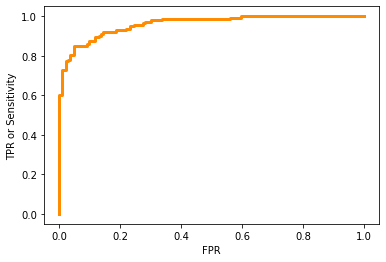

In [46]:
# roc curve
fpr, tpr, _ = roc_curve(y_val, probs)
plt.plot(fpr, tpr, color='darkorange', lw=3)
plt.xlabel('FPR')
plt.ylabel('TPR or Sensitivity')

In [47]:
# AUC: higher the better
roc_auc_score(y_val, probs)

0.9619644418536869

### Crossvalidation Classification

In [48]:
# standardizing the predictor
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [49]:
# Crossvalidation
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
shuffle_split = StratifiedShuffleSplit(test_size = 0.2, n_splits = 10, random_state = 123)
scores = cross_val_score(model, X_std, y, cv = shuffle_split,
                         scoring='f1')
print(scores)
print('Mean f1 Score = ',scores.mean())

[0.88721805 0.88727273 0.87142857 0.90714286 0.85818182 0.88405797
 0.86446886 0.85714286 0.89454545 0.85017422]
Mean f1 Score =  0.87616333823383


### KNN Model

In [50]:
# importing KNN
from sklearn.neighbors import KNeighborsClassifier

In [51]:
# Train the model
model = KNeighborsClassifier(n_neighbors = 11)
model.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=11)

In [52]:
# Prediction
y_pred = model.predict(X_val_std)

In [53]:
# confusion matrix
from sklearn.metrics import confusion_matrix
labels = np.unique(y_val)
cm = confusion_matrix(y_val, y_pred, labels=labels)
pd.DataFrame(cm, index=labels, columns=labels)

,0,1
0,137,9
1,28,113


In [54]:
# Evaluation scores
print('Accuracy', accuracy_score(y_val, y_pred))
print('Recall', recall_score(y_val, y_pred))
print('Precision', precision_score(y_val, y_pred))
print('F1 Score', f1_score(y_val, y_pred))

Accuracy 0.8710801393728222
Recall 0.8014184397163121
Precision 0.9262295081967213
F1 Score 0.8593155893536122


#### Crossvalidation KNN

In [55]:
# Crossvalidation
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
shuffle_split = StratifiedShuffleSplit(test_size = 0.2, n_splits = 10, random_state = 123)
scores = cross_val_score(model, X_std, y, cv = shuffle_split,
                         scoring='f1')
print(scores)
print('Mean f1 Score = ',scores.mean())

[0.85283019 0.88       0.86545455 0.9        0.83333333 0.87591241
 0.84615385 0.84210526 0.86891386 0.84587814]
Mean f1 Score =  0.8610581579416609


#### Decision Tree

In [56]:
# importing decision tree
from random import random
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0, max_depth = 4)
model.fit(X_train_std, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [57]:
# Export the decision tree
from sklearn.tree import export_graphviz
export_graphviz(model, out_file= 'tree.dot', impurity=True, filled=True, rounded=True, feature_names=X_train.columns[0:8], class_names=['0','1'])

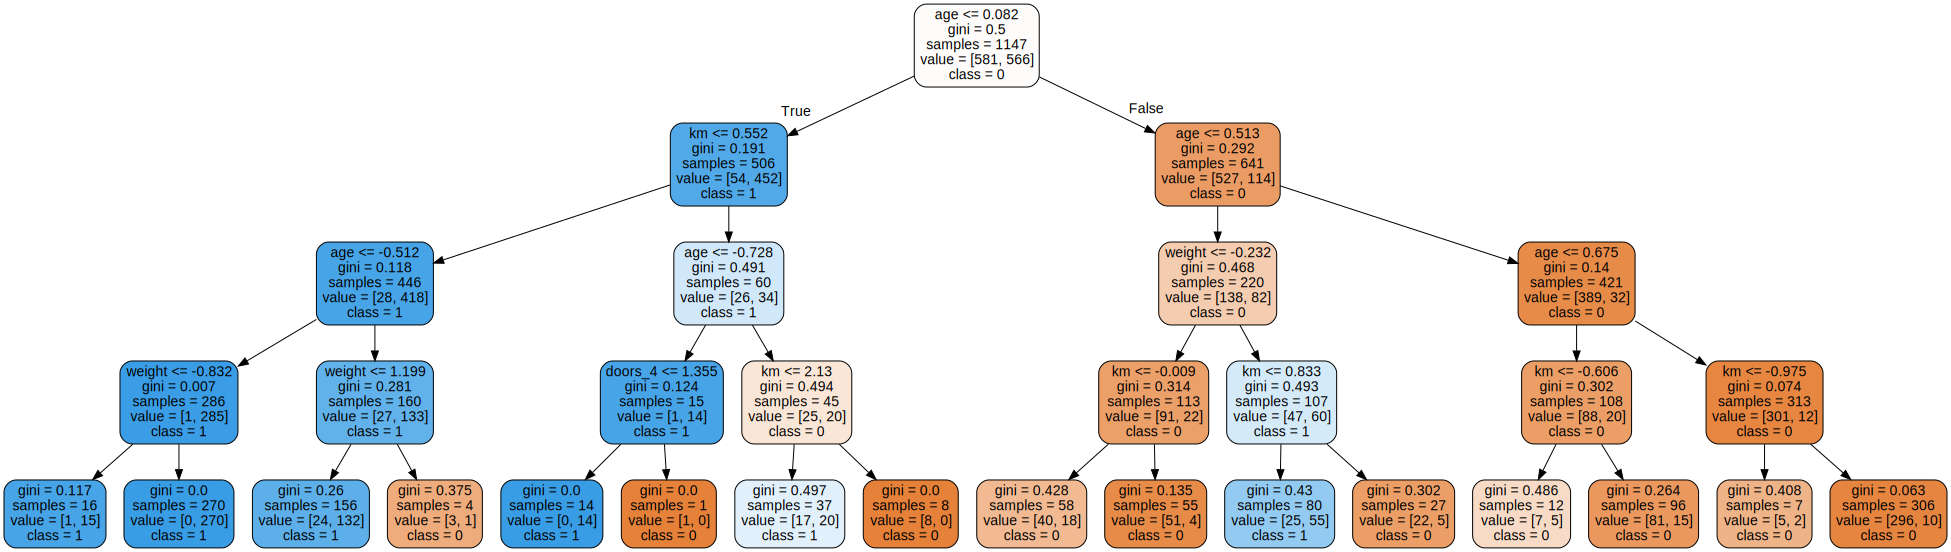

In [58]:
# plot the tree
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [59]:
# Prediction
y_pred = model.predict(X_val_std)

In [60]:
# confusion matrix
from sklearn.metrics import confusion_matrix
labels = np.unique(y_val)
cm = confusion_matrix(y_val, y_pred, labels=labels)
pd.DataFrame(cm, index=labels, columns=labels)

,0,1
0,133,13
1,16,125


In [61]:
# Evaluation scores
print('Accuracy', accuracy_score(y_val, y_pred))
print('Recall', recall_score(y_val, y_pred))
print('Precision', precision_score(y_val, y_pred))
print('F1 Score', f1_score(y_val, y_pred))

Accuracy 0.8989547038327527
Recall 0.8865248226950354
Precision 0.9057971014492754
F1 Score 0.8960573476702509


#### Crossvalidation Decision Tree

In [62]:
# Crossvalidation
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
shuffle_split = StratifiedShuffleSplit(test_size = 0.2, n_splits = 10, random_state = 123)
scores = cross_val_score(model, X_std, y, cv = shuffle_split,
                         scoring='f1')
print(scores)
print('Mean f1 Score = ',scores.mean())

[0.89605735 0.83892617 0.86805556 0.88659794 0.84641638 0.87455197
 0.85714286 0.82685512 0.87455197 0.83687943]
Mean f1 Score =  0.8606034754213553
